### LOAD DATA

In [11]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("titanic.csv")

# Show the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

### Check for Null values

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### CLEAN AND PREPARE

In [14]:
# Drop columns that aren't helpful
df.drop(columns=["Cabin", "Name", "Ticket"], inplace=True, errors="ignore")

# Fill missing age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill missing embarked with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Encode categorical features
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

### VIZUALIZATION

C:\Users\kripa\AppData\Local\Temp\ipykernel_21476\3068515199.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=custom_palette)
C:\Users\kripa\AppData\Local\Temp\ipykernel_21476\3068515199.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Survived', data=df, palette=custom_palette)


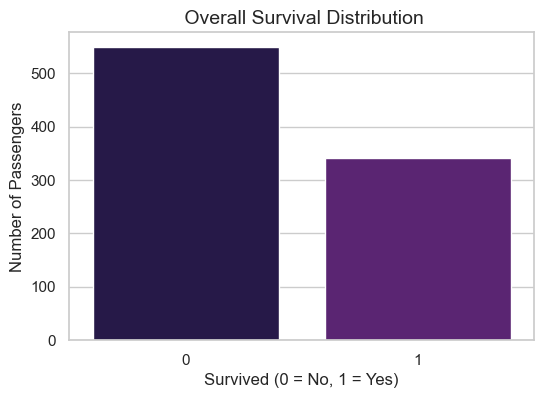

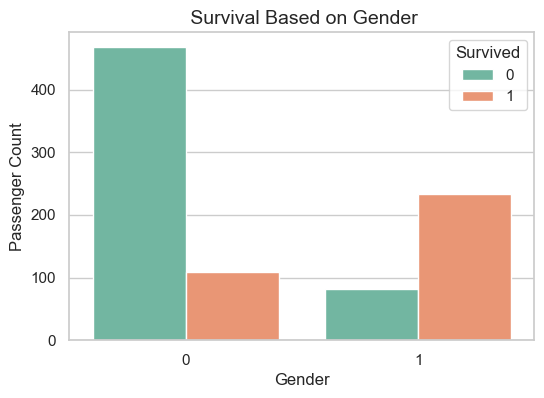

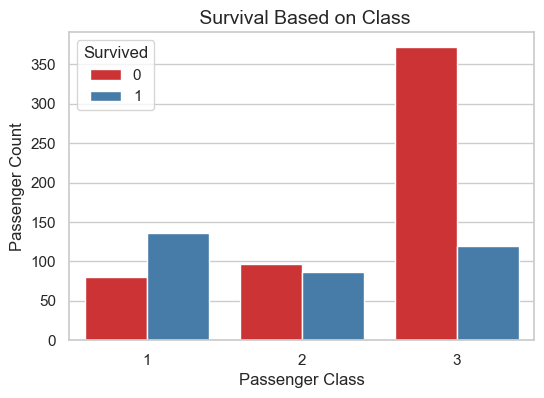

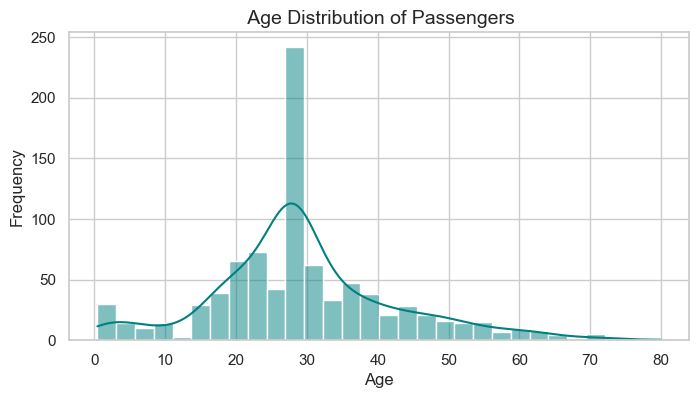

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
custom_palette = sns.color_palette("magma")

# 1. Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette=custom_palette)
plt.title(" Overall Survival Distribution", fontsize=14)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

# 2. Gender vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette="Set2")
plt.title(" Survival Based on Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Passenger Count")
plt.show()

# 3. Passenger Class vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette="Set1")
plt.title(" Survival Based on Class", fontsize=14)
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Count")
plt.show()

# 4. Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True, color='teal')
plt.title(" Age Distribution of Passengers", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### SPLIT & TRAIN MODEL

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df.drop(columns=["Survived", "PassengerId"])
y = df["Survived"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest (unique choice vs Logistic)
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.8044692737430168

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



### FEATURE IMPORTANCE

C:\Users\kripa\AppData\Local\Temp\ipykernel_21476\132218165.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df, palette="coolwarm")


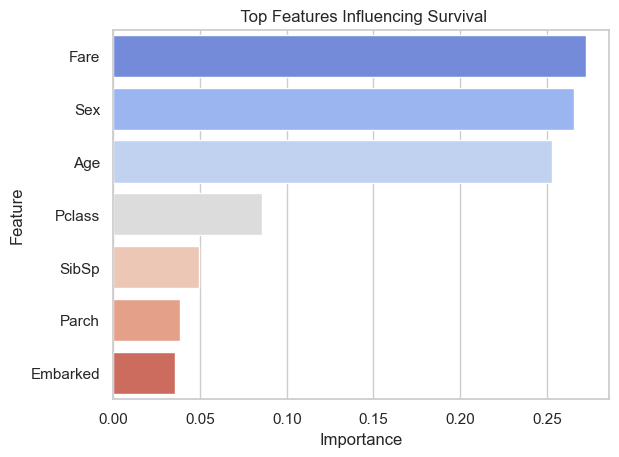

In [17]:
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_df.sort_values(by="Importance", ascending=False, inplace=True)

sns.barplot(x="Importance", y="Feature", data=feature_df, palette="coolwarm")
plt.title(" Top Features Influencing Survival")
plt.show()